# 데이터불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('train.csv')

#### df 데이터 프레임에서 Cabin, Name, Ticket 열은 제거해주세요

In [ ]:
df = 

#### df 데이터 프레임의 모든 결측치를 제거해봅시다

In [ ]:
df = 

#### 원할한 과제 진행을 위해 아래 코드 한번 실행시켜주세요

In [ ]:
df = df.reset_index(drop=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


#### df 데이터 프레임을 features와 target으로 구분지읍시다
#### target = Survived, features는 그 외 모든 변수

In [ ]:
features = 
target = 

#### features 데이터 프레임을 카테고리형 변수(Pclass, Sex, Embarked),
#### 연속형 변수('Age','SibSp','Parch','Fare')로 구분하여 각각
#### features_cat, features_con 변수에 저장해주세요

In [ ]:
features_cat = 
features_con = 

#### features_cat.info()를 통해 데이터의 자료형을 확인해봅시다

In [ ]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    int64
 2   Embarked  712 non-null    int64
dtypes: int64(3)
memory usage: 16.8 KB


#### features_cat 데이터프레임을 숫자로 인코딩합시다
#### 그리고 features_cat의 모든 열이 int 자료형으로 지정되도록 확인합시다

In [ ]:
features_cat['Sex'] = 
features_cat['Embarked'] = 
features_cat['Pclass'] = 

#### features_con 데이터 프레임은 표준화 작업을 진행해줍시다
#### 그리고 features_con_std 변수에 데이터 프레임 형태로 저장해줍시다

In [ ]:
stand = StandardScaler()
features_con_std = pd.DataFrame(stand.fit_transform(features_con),columns = features_con.columns)

#### 경사 하강법 구현을 위해 적절한 데이터를 찾아보겠습니다

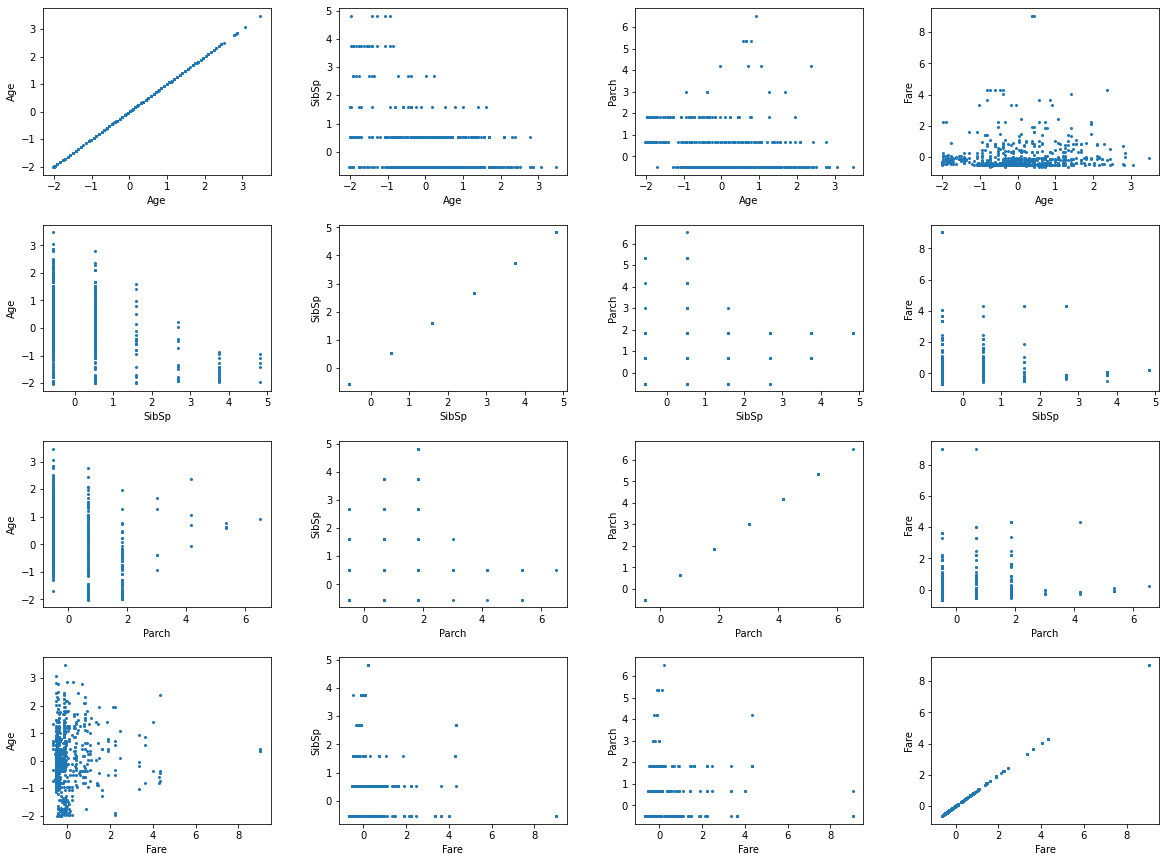

In [ ]:
f, axes = plt.subplots(4, 4)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

col_lis = list(features_con_std.columns)
for i in range(4):
  for j in range(4):
    axes[i,j].scatter(features_con_std[col_lis[i]],features_con_std[col_lis[j]],s = 4)
    axes[i,j].set_xlabel(col_lis[i])
    axes[i,j].set_ylabel(col_lis[j])

plt.show()

#### 앞으로의 실습에서 features_con_std 데이터 프레임의 
#### x = Age, y = Fare를 사용해보도록 합시다

#### 우선 훈련셋, 테스트 셋으로 데이터 구분합시다(test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split


#### 경사하강법 코드를 실행하여 최적의 w,b를 찾아주세요

In [ ]:
errors = []
ww = []
# random 한 값으로 w, b의 초기값을 설정합니다
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

x = x_train
y = y_train

#에포크()
num_epoch = 150
learning_rate = 0.1

for epoch in range(num_epoch):
    y_hat = x * w + b
    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    ww.append(w)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print(epoch,'w:' ,round(w,5),'b:' ,round(b,5), 'error:',round(error,5))

 0 w = 0.83098, b = -0.56051 error = 1.98580
 5 w = 0.55129, b = -0.32881 error = 1.35773
10 w = 0.38299, b = -0.18962 error = 1.13062
15 w = 0.28172, b = -0.10600 error = 1.04849
20 w = 0.22078, b = -0.05576 error = 1.01879
25 w = 0.18411, b = -0.02558 error = 1.00805
30 w = 0.16204, b = -0.00745 error = 1.00417
35 w = 0.14877, b = 0.00344 error = 1.00276
40 w = 0.14078, b = 0.00999 error = 1.00226
45 w = 0.13598, b = 0.01392 error = 1.00207
50 w = 0.13308, b = 0.01629 error = 1.00201
55 w = 0.13134, b = 0.01771 error = 1.00198
60 w = 0.13030, b = 0.01856 error = 1.00197
65 w = 0.12967, b = 0.01907 error = 1.00197
70 w = 0.12929, b = 0.01938 error = 1.00197
75 w = 0.12906, b = 0.01957 error = 1.00197
80 w = 0.12892, b = 0.01968 error = 1.00197
85 w = 0.12884, b = 0.01974 error = 1.00197
90 w = 0.12879, b = 0.01978 error = 1.00197
95 w = 0.12876, b = 0.01981 error = 1.00197
100 w = 0.12874, b = 0.01982 error = 1.00197
105 w = 0.12873, b = 0.01983 error = 1.00197
110 w = 0.12873, b = 0.

#### 실습 결과 나타난 최적의 w, b 값을 이용하여 predict 데이터를 만드세요


#### y_test와 y_pred를 이용하여 MSE를 구해보세요

In [ ]:
from sklearn.metrics import mean_squared_error


0.9720764440104589

#### w값에 따른 오차를 그래프를 통해 시각화 해보세요
#### 위 경사하강법 코드에서 만든 ww, errors 리스트를 활용

Text(0, 0.5, 'error')

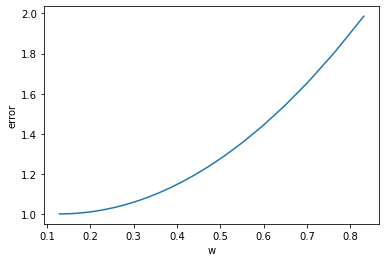

#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Age와 Fare의 분포는 plt.scatter로 같이 시각화 해봅시다

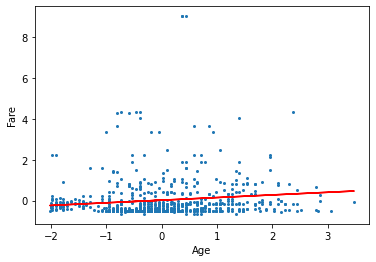

## 확률적 경사하강법(직접 구현보단 SGDRegressor라는 패키지를 사용합시다)

### SGDRegressor 패키지를 불러오고, 파라미터 세팅은 아래와 같이 진행해봅시다
### from sklearn.linear_model import SGDRegressor

#### shuffle = True
#### learning_rate = 'invscaling'
#### eta0 = 0.5
#### max_iter = 1000
#### penalty = None

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = 

#### 데이터를 훈련, 테스트 셋으로 나누어주세요(test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = 

#### SGDRegressor에 데이터를 투입하기 위해선 데이터가 (-1,1) 형태의 넘파이 배열이여야 합니다
#### array([1],
####           [2],
####           [3])
#### x_train, y_train을 형태로 reshape 함수를 이용해 가공해주세요

In [ ]:
x = np.array(x_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)

#### 위에서 선언한 sgd_reg에 x와 y를 fit해주세요

In [ ]:
sgd_reg.fit(x,y)

print(sgd_reg.coef_)
print(sgd_reg.intercept_)

[0.062056]
[-0.01754392]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 학습된 모델에 x_test를 통해 y_pred를 만들어주세요
#### (이때 투입될 x_test도 reshape(-1,1)해야 투입 가능합니다)

In [ ]:
y_pred = 

#### 마찬가지로 예측치와 y_test간의 mse를 산출해봅시다

1.7357651391990743

## 미니배치 경사하강법

### 다시 한번 훈련, 테스트 데이터를 나눠볼게요(x = Age열, y = Fare열)
### test_size = 0.1, random_state = 42

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std['Age'], features_con_std['Fare'], test_size = 0.1, random_state = 42)

### 이번엔 4개의 훈련, 테스트 데이터 모두 np.array를 통해 넘파이 배열로 전환해주세요

#### 혹시 모르니 중간에 x_train, y_train, x_test, y_test의 shape을 확인해주고 갑시다. train은 640, test는 72가 나오면 맞습니다

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(640,)
(640,)
(72,)
(72,)


#### 미니배치 경사하강법 코드는 아래와 같습니다. 


In [ ]:
num_epoch=10
learning_rate=0.1
w = np.random.uniform(low=0, high=1.0)
b = np.random.uniform(low=0, high=1.0)
ww = []
err = []

for epoch in range(num_epoch):
    print("epoch: ", epoch)
    print("-"*50)
    batch_size = 60
    batch_number = 100/10
    start = 0
    end = 60
    for iteration in range(int(batch_number)):
    
        #매 iteration마다 batch_size=60에 해당하는 데이터 셋을 가져옴
        x_batch = x_train[start: end]
        y_batch = y_train[start: end]
        
        start += 10
        end += 10

        # 선택한 batch의 예측값
        predict_batch = w*x_batch + b

        # 가중치 업데이트
        w = w - 2*learning_rate*((predict_batch - y_batch)*x_batch).mean()
        b = b - 2*learning_rate * (predict_batch - y_batch).mean()

        #error값은 전체 데이터셋의 오류값을 계산해야한다.
        predict = w*x + b
        error = ((y - predict)**2).mean()

        print("iteration ", iteration, "w =", w, "b= ",b, 'error= ', error)
        ww.append(w)
        err.append(error)

    if error < 0.000001:
            break
print("최종: ","w= ", w, "b= ", b, "error= ", error)

epoch:  0
--------------------------------------------------
iteration  0 w = 0.22453737120866954 b=  0.7151147033307553 error=  1.4433064070866364
iteration  1 w = 0.17889179382627501 b=  0.5730007215660133 error=  1.2492632164851951
iteration  2 w = 0.14057809018713321 b=  0.48352315194600504 error=  1.1490988076259607
iteration  3 w = 0.1204279004507708 b=  0.3936712801928909 error=  1.0679447062119762
iteration  4 w = 0.1101276906811237 b=  0.33231238710244704 error=  1.0223118767622084
iteration  5 w = 0.11611398528651126 b=  0.30062321942114567 error=  1.001981648652526
iteration  6 w = 0.12448285158688677 b=  0.28091304030264935 error=  0.9905850562361241
iteration  7 w = 0.13990717863748897 b=  0.28961571610724063 error=  0.9966324471865748
iteration  8 w = 0.16488891135702147 b=  0.2989060090035372 error=  1.0048183322356674
iteration  9 w = 0.1907012790581295 b=  0.30922804847484775 error=  1.0152484268784228
epoch:  1
--------------------------------------------------
iterat

### 위에서 얻은 최종 w와 b값을 통해 y_pred를 넘파이 배열로 만들어 볼게요

### y_test와 y_pred를 이용해 mse를 구해봅시다

0.7042685693806066

#### w값에 따른 오차를 그래프를 통해 시각화 해보세요
#### 위에서 만든 ww, err 리스트를 활용

Text(0, 0.5, 'error')

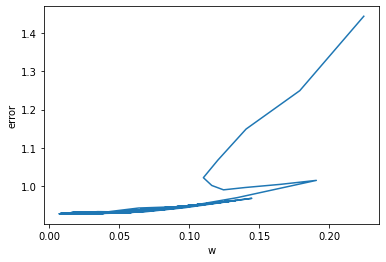

#### 경사하강법을 통해 구한 식을 plt.plot을 통한 직선, Age와 Fare의 분포는 plt.scatter로 같이 시각화 해봅시다

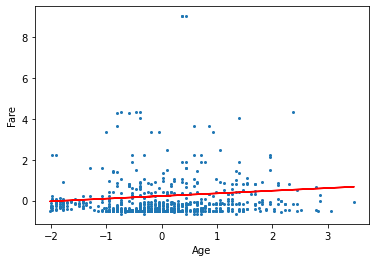

# 분류
## SGDclassifier

#### SGD classifier에 넣을 데이터는 target, features_con_std입니다

#### features_con_std, 그리고 target를 훈련, 테스트 데이터로 분할합시다(test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = 

#### 훈련 데이터 셋을 SGDClassifier로 학습 시키고 훈련데이터로 점수를 확인해봅시다
#### SGDClassifier의 파라미터에 loss = 'log', max_iter = 100으로 지정해볼게요

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = 
sc.fit(x_train, y_train)

print(sc.score(x_train, y_train))

0.40963855421686746


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.score(x_test, y_test)

0.397196261682243

## Cross-entropy

#### logistic 회귀 모델의 성능을 cross-entropy를 통해 평가해보겠습니다.

#### 우선 lg라는 logisticRegression 객체를 만듭시다

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

#### features_con_std와 target을 이용해 훈련, 테스트 데이터 셋을 나눠 줍시다
#### 그리고 모델에 fit시킵시다
#### test_size = 0.3, random_state = 42

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_con_std, target, test_size = 0.3, random_state = 42)
lg.fit(x_train, y_train)

LogisticRegression()

#### 시그모이드 함수(sigmoid(x))를 선언해주세요

In [ ]:
def sigmoid(x):


#### 다 구현하였다면 아래의 코드를 실행하여 예측치(확률)을 구합시다

In [ ]:
pred = []
for i in (np.array(x_test).dot(lg.coef_.T)+ lg.intercept_[0]).reshape(-1):
  pred.append(sigmoid(i))
pred = np.array(pred)

#### 아래의 cross_entropy 함수에 예측치와 실제값을 넣어주어 cross-entropy를 출력해주세요.
#### 단, 실제값(y_test)는 np.array로 변환해야 코드가 실행됩니다

In [ ]:
def cross_entropy(pred, target):
    # 교차 엔트로피 합
    delta = 1e-7        # log 0을 계산할 수 없으므로, 아주 작은 값을 넣음
    return -np.sum(target * np.log(pred + delta))

cross_entropy()

68.63598771398172

#### 위에서 구한 pred는 로지스틱을 통해 산출한 확률이었습니다

#### pred 배열을 전부 np.round로 반올림하고 int자료형으로 전환해 분류형으로 만들고 pred_int 변수에 저장해주세요

In [ ]:
pred_int = 

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

#### pred_int를 이용해 모델의 정확도를 구해주세요

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_int,np.array(y_test))

0.6728971962616822

#### 성능이 너무 떨어지죠...? 이번엔 실습에서 제외하였던 변수들을 나머지 모두 사용하볼게요

#### 아까 따로 분리해둔 카테고리 변수를 더미변수로써 사용할 겁니다
#### 그전에 카테고리 변수들의 자료형을 features_cat.info()를 통해 확인해줍시다

In [ ]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    712 non-null    object
 1   Sex       712 non-null    object
 2   Embarked  712 non-null    object
dtypes: object(3)
memory usage: 16.8+ KB


#### 싹다 object 자료형으로 전환해주세요

#### pd.get_dummies를 통해 더미변수화 해주시되, drop_first=True를 꼭 추가해주세요

In [ ]:
features_cat_dum = 

#### 더미화된 데이터프레임, 그리고 아까 사용한 features_con_std 데이터프레임을
#### pd.concat을 활용해서 양옆으로 결합해주세요
#### 이 데이터 프레임은 features_com이란 변수에 저장해줍시다

In [ ]:
features_com = 

#### features_com, target으로 훈련, 테스트 데이터를 나눕시다
#### 그리고 훈련데이터를 아까 선언한 lg에 fit해주세요
#### test_size = 0.3, random_state = 42

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_com, target, test_size = 0.3, random_state = 42)
lg.fit(x_train, y_train)

LogisticRegression()

#### 위에서 구현한 로지스틱 회귀 코드를 그대로 가져왔습니다. 똑같이 실행해볼까요?

In [ ]:
pred = []
for i in (np.array(x_test).dot(lg.coef_.T)+ lg.intercept_[0]).reshape(-1):
  pred.append(sigmoid(i))
pred = np.array(pred)

#### cross-entropy와 정확도를 확인해주세요(각 함수들의 괄호를 채워주시면 됩니다)

In [ ]:
cross_entropy()

46.926110280282145

In [ ]:
accuracy_score()

0.822429906542056

#### 성능이 좋아졌으면 성공하셨고, 아니면 실수한 부분 없는지 체크해보시면 될 듯 합니다!

#### 로지스틱도 경사하강법으로 계수랑 절편 찾는 거 구현하고 싶었는데 능력부족으로 하지 못했습니다 

https://tobigs.gitbook.io/tobigs/data-analysis/undefined-1/python-1

혹시라도 관심있으신 분들은 이 링크 참조해주시면 될 거 같아요!!

고생 많으셨습니다.